Exercise 1

Data visualization helps us to understand the data quickly
Line graph allows us to see trends over time and to compare different datasets

Exercise 2

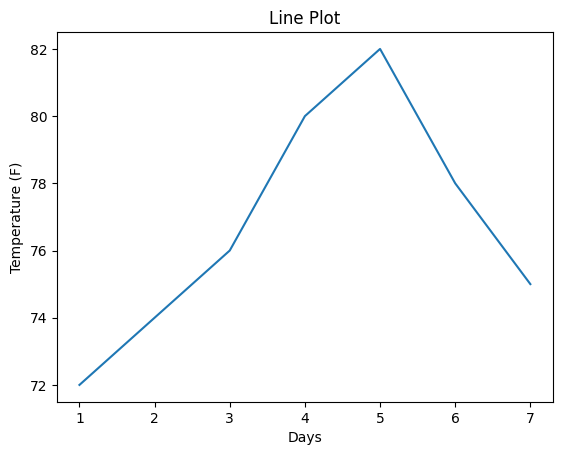

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

days = [1,2,3,4,5,6,7]
temperature = [72, 74, 76, 80, 82, 78, 75]

plt.figure()
plt.xlabel('Days')
plt.ylabel('Temperature (F)')
plt.title('Line Plot')
plt.plot(days, temperature)
plt.show()

Exercise 3

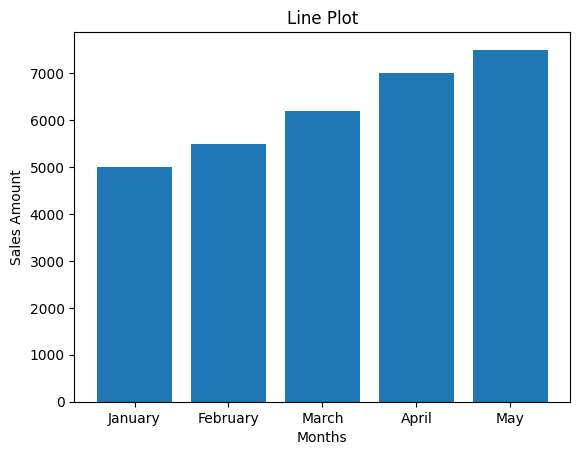

In [6]:
months = ['January','February','March','April','May']
temperature = [5000, 5500, 6200, 7000, 7500]

plt.figure()
plt.xlabel('Months')
plt.ylabel('Sales Amount')
plt.title('Line Plot')
plt.bar(months, temperature)
plt.show()

Exercise 4

In [16]:
import pandas as pd

sddf = pd.read_csv('sales_data.csv')
sddf.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [17]:
sddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [18]:
sddf = sddf.drop_duplicates()

In [19]:
sddf.isnull().sum()

,0
date,0
product,0
category,0
price,2
quantity,1
revenue,1


In [20]:
sddf[sddf.isnull().any(axis=1)]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [23]:
sddf['revenue'] = sddf['revenue'].fillna(sddf['price']*sddf['quantity'])
sddf['quantity'] = sddf['quantity'].fillna(sddf['revenue']/sddf['price'])
sddf['price'] = sddf['price'].fillna(sddf['revenue']/sddf['quantity'])


In [24]:
sddf[sddf.isnull().any(axis=1)]

,date,product,category,price,quantity,revenue


Total products sold

In [25]:
sddf['quantity'].sum()

5341.0

Identify the category that had the highest revs and calculate how much it generated

In [26]:
revenue_by_category = sddf.groupby('category')['revenue'].sum()
revenue_by_category

,revenue
category,
Accessories,106700.0
Bags,19500.0
Bgas,900.0
Clohting,1200.0
Clothing,93150.0
Electronics,516080.0
Shoes,20640.0
Shoeses,960.0


In [27]:
max_revenue = revenue_by_category.idxmax()
max_revenue

'Electronics'

Determine the average revenue per sale in the dataset

In [28]:
average_revenue = sddf['revenue'].mean()
average_revenue

2062.853260869565

Create a bar chart to visualize the total revenue generated in each quarter of the year (Q1, Q2, Q3, Q4).


In [34]:
#since the dataset is not grouped by Qs, then we will have to do it. Pandas has a nice function that generates each quarter

sddf['date'] = pd.to_datetime(sddf['date'])
sddf['quarter'] = sddf['date'].dt.quarter
sddf.head()

rev_by_quarter = sddf.groupby('quarter')['revenue'].sum()
rev_by_quarter



,revenue
quarter,
1,182100.0
2,185970.0
3,197680.0
4,193380.0


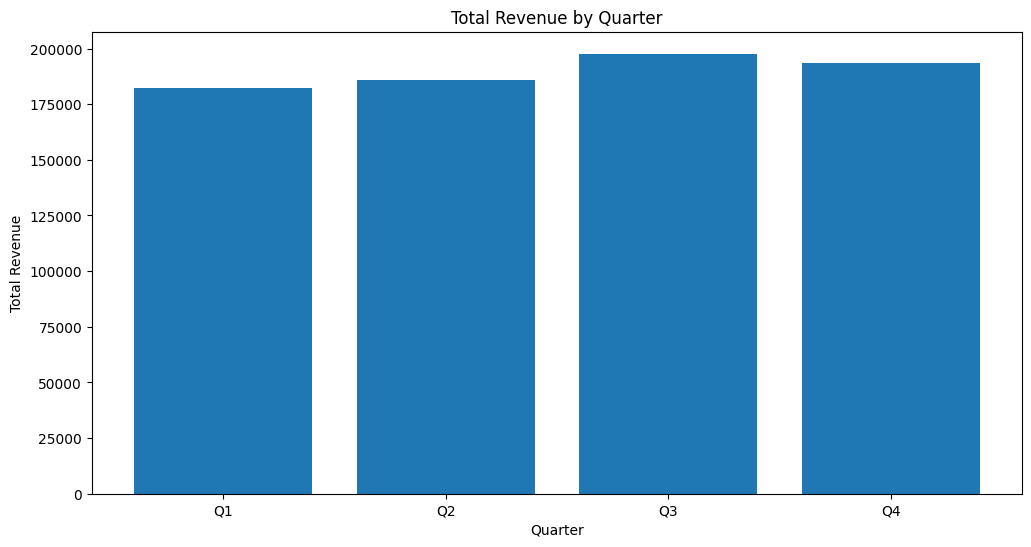

In [46]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(rev_by_quarter.index, rev_by_quarter.values)
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Quarter")
plt.xticks(rev_by_quarter.index, ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

Exercise 5

Create a simple line plot using Matplotlib. Plot the function y = x^2 for x values ranging from -10 to 10. Add a title and label the x and y axes.


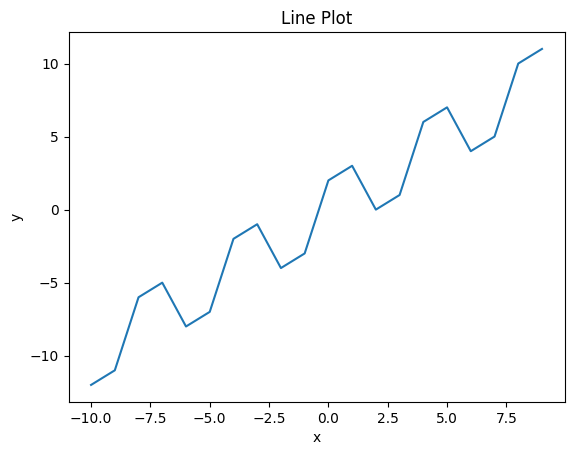

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10)
y = x^2

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.plot(x,y)
plt.show()

Generate a bar chart to display the sales data of four different products (A, B, C, D) in a week. The sales values are 15, 30, 45, and 20 respectively. Label the chart appropriately.

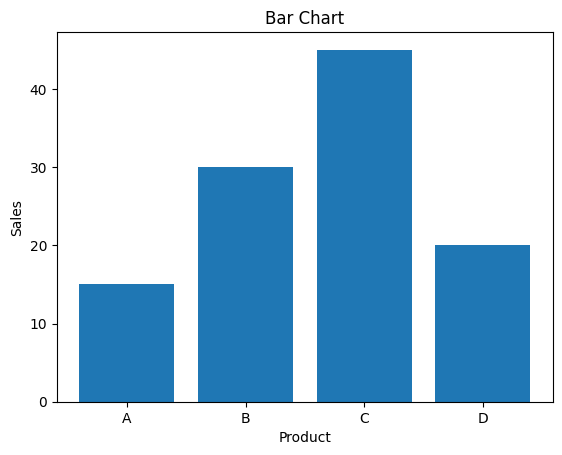

In [53]:
product = ['A', 'B', 'C', 'D']
sales = [15, 30, 45, 20]

plt.figure
plt.bar(product, sales)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Bar Chart')
plt.show()

Create a pie chart representing the following data about favorite fruits of a group of people: Apples (40%), Bananas (30%), Cherries (20%), and Dates (10%). Customize the chart with different colors for each fruit and add a legend.

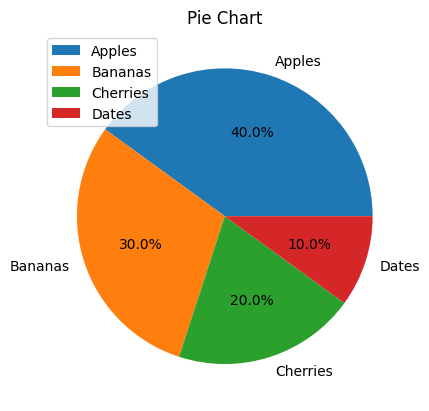

In [61]:
fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
sales = [40, 30, 20, 10]

plt.figure(20*4)
plt.pie(sales, labels=fruits, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.legend(fruits, loc='upper left')
plt.show()